In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**VGG16**

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define dataset paths and class labels
data_dir = "/content/drive/MyDrive/nails disease"
class_names = [ 'black_line', 'clubbing','muehrckes_lines', 'onycholysis', 'white_spot']

# Load images and labels
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_path in os.listdir(class_dir):
        image = cv2.imread(os.path.join(class_dir, image_path), cv2.IMREAD_UNCHANGED)  # Read BMP images
        images.append(image)
        labels.append(class_names.index(class_name))

# Convert data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess images (adjust parameters as needed)
image_size = (144, 144)  # Adjust based on model requirements
images = np.array([cv2.resize(img, image_size) for img in images])
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Create data augmentation for training data (optional)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = datagen.flow(x_val, y_val, batch_size=32)

# Load pre-trained VGG16 model and freeze weights for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_size + (3,))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create new model with fine-tuned layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Save the model (optional)
model.save('nail_disease_classification.h5')


58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/20
41/41 [==============================] - 331s 8s/step - loss: 1.7892 - accuracy: 0.4299 - val_loss: 1.1095 - val_accuracy: 0.5764
Epoch 2/20
41/41 [==============================] - 331s 8s/step - loss: 0.8601 - accuracy: 0.6592 - val_loss: 0.7367 - val_accuracy: 0.7292
Epoch 3/20
41/41 [==============================] - 322s 8s/step - loss: 0.6817 - accuracy: 0.7529 - val_loss: 0.7472 - val_accuracy: 0.6944
Epoch 4/20
41/41 [==============================] - 326s 8s/step - loss: 0.5935 - accuracy: 0.7800 - val_loss: 0.7159 - val_accuracy: 0.6944
Epoch 5/20
41/41 [==============================] - 328s 8s/step - loss: 0.5010 - accuracy: 0.8234 - val_loss: 0.5279 - val_accuracy: 0.8333
Epoch 6/20
41/41 [==============================] - 320s 8s/step - loss: 0.4910 - accuracy: 0.8180 - val_loss: 0.7033 - val_accuracy: 0.7292
Epoch 7/20
41/41 [==============================] - 314s 8s/step - loss: 0.4380 - accuracy: 0.8381 - val_loss: 0.6065 - val_accuracy: 0.7431
Epoch 8/20
41

KeyboardInterrupt: 

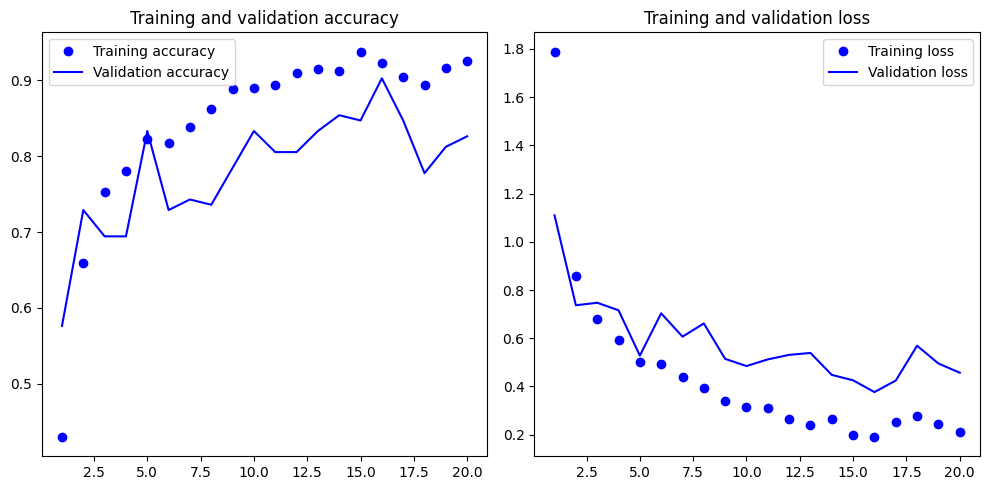

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary containing training information

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Create epochs list

plt.figure(figsize=(10, 5))  # Create a figure with specified size

# Plot accuracy
plt.subplot(121)  # Create a subplot in a 1x2 grid (first position)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.subplot(122)  # Create a subplot in a 1x2 grid (second position)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code remains the same)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Create classification report
cr = classification_report(y_test, y_pred_classes, target_names=class_names)
print('Classification Report:\n', cr)


5/5 [==============================] - 39s 7s/step
Confusion Matrix:
 [[30  1  1  0  1]
 [ 0 44  0  1  1]
 [ 2  2 22  2  0]
 [ 0  5  0 16  4]
 [ 0  1  0  1 26]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       0.94      0.91      0.92        33
       clubbing       0.83      0.96      0.89        46
muehrckes_lines       0.96      0.79      0.86        28
    onycholysis       0.80      0.64      0.71        25
     white_spot       0.81      0.93      0.87        28

       accuracy                           0.86       160
      macro avg       0.87      0.84      0.85       160
   weighted avg       0.87      0.86      0.86       160



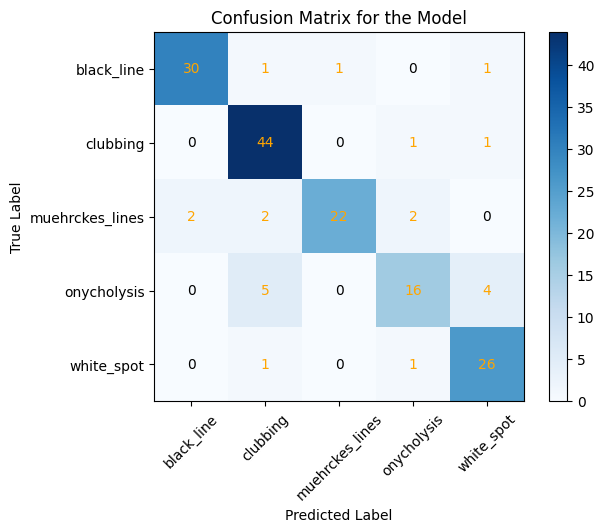

In [ ]:
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)

plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
for i in range(len(cm)):
  for j in range(len(cm[i])):
    text = plt.text(j, i, cm[i, j], ha='center', va='center', color='orange' if cm[i, j] > 0 else 'black')

plt.title('Confusion Matrix for the Model')
plt.colorbar()
plt.show()

**VGG16**

In [ ]:
#VGG16

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define dataset paths and class labels
data_dir = "/content/drive/MyDrive/nails disease"
class_names = [ 'black_line', 'clubbing','muehrckes_lines', 'onycholysis', 'white_spot']

# Load images and labels
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_path in os.listdir(class_dir):
        image = cv2.imread(os.path.join(class_dir, image_path), cv2.IMREAD_UNCHANGED)  # Read BMP images
        images.append(image)
        labels.append(class_names.index(class_name))

# Convert data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess images (adjust parameters as needed)
image_size = (144, 144)  # Adjust based on model requirements
images = np.array([cv2.resize(img, image_size) for img in images])
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Create data augmentation for training data (optional)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = datagen.flow(x_val, y_val, batch_size=32)

# Load pre-trained VGG16 model and freeze weights for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_size + (3,))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create new model with fine-tuned layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Save the model (optional)
model.save('nail_disease_classification.h5')


Epoch 1/20
41/41 [==============================] - 378s 9s/step - loss: 1.7852 - accuracy: 0.4779 - val_loss: 0.9606 - val_accuracy: 0.5903
Epoch 2/20
41/41 [==============================] - 382s 9s/step - loss: 0.8873 - accuracy: 0.6576 - val_loss: 0.8484 - val_accuracy: 0.6736
Epoch 3/20
41/41 [==============================] - 378s 9s/step - loss: 0.7556 - accuracy: 0.7157 - val_loss: 0.6954 - val_accuracy: 0.7431
Epoch 4/20
41/41 [==============================] - 385s 9s/step - loss: 0.6233 - accuracy: 0.7761 - val_loss: 0.6883 - val_accuracy: 0.7222
Epoch 5/20
41/41 [==============================] - 378s 9s/step - loss: 0.5621 - accuracy: 0.7978 - val_loss: 0.6322 - val_accuracy: 0.7431
Epoch 6/20
41/41 [==============================] - 381s 9s/step - loss: 0.5076 - accuracy: 0.8156 - val_loss: 0.6015 - val_accuracy: 0.7917
Epoch 7/20
41/41 [==============================] - 379s 9s/step - loss: 0.4714 - accuracy: 0.8242 - val_loss: 0.5640 - val_accuracy: 0.7847
Epoch 8/20
41

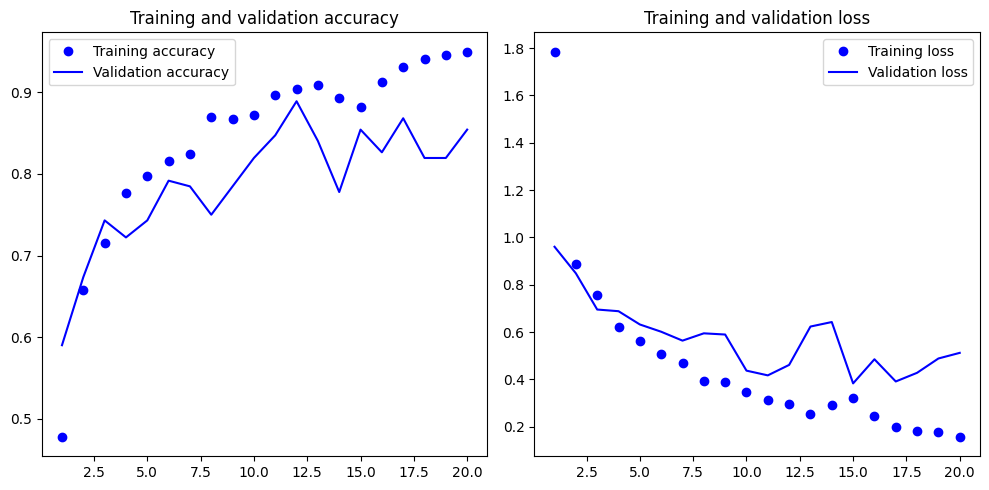

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary containing training information

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Create epochs list

plt.figure(figsize=(10, 5))  # Create a figure with specified size

# Plot accuracy
plt.subplot(121)  # Create a subplot in a 1x2 grid (first position)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.subplot(122)  # Create a subplot in a 1x2 grid (second position)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code remains the same)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Create classification report
cr = classification_report(y_test, y_pred_classes, target_names=class_names)
print('Classification Report:\n', cr)


5/5 [==============================] - 46s 8s/step
Confusion Matrix:
 [[28  0  1  1  3]
 [ 1 44  0  1  0]
 [ 0  1 23  4  0]
 [ 0  0  0 21  4]
 [ 1  3  0  3 21]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       0.93      0.85      0.89        33
       clubbing       0.92      0.96      0.94        46
muehrckes_lines       0.96      0.82      0.88        28
    onycholysis       0.70      0.84      0.76        25
     white_spot       0.75      0.75      0.75        28

       accuracy                           0.86       160
      macro avg       0.85      0.84      0.84       160
   weighted avg       0.86      0.86      0.86       160



5/5 [==============================] - 50s 10s/step
Confusion Matrix:
 [[28  0  1  1  3]
 [ 1 44  0  1  0]
 [ 0  1 23  4  0]
 [ 0  0  0 21  4]
 [ 1  3  0  3 21]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       0.93      0.85      0.89        33
       clubbing       0.92      0.96      0.94        46
muehrckes_lines       0.96      0.82      0.88        28
    onycholysis       0.70      0.84      0.76        25
     white_spot       0.75      0.75      0.75        28

       accuracy                           0.86       160
      macro avg       0.85      0.84      0.84       160
   weighted avg       0.86      0.86      0.86       160



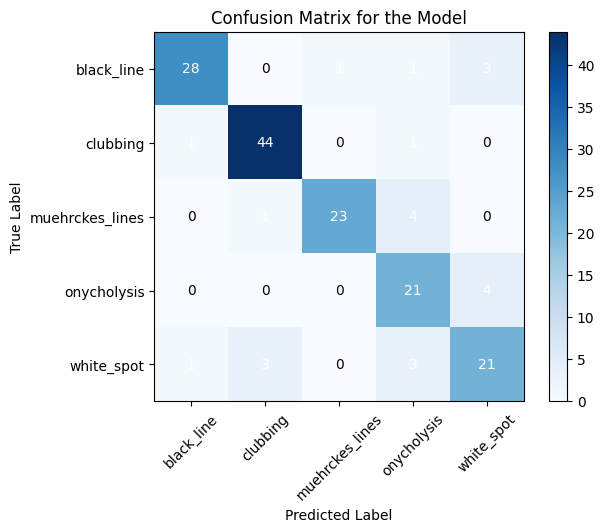

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix and classification report
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred_classes, target_names=class_names))

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
for i in range(len(cm)):
  for j in range(len(cm[i])):
    text = plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > 0 else 'black')

plt.title('Confusion Matrix for the Model')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from keras.models import load_model  # Assuming you saved your trained Keras model
from sklearn.base import BaseEstimator, ClassifierMixin

# Define a custom scikit-learn compatible wrapper for your Keras model
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    # ... (implement other methods like predict_proba, score if needed)

# Load your trained Keras model
model = load_model('nail_disease_classification.h5')

# Wrap the model in the scikit-learn wrapper
sklearn_model = KerasClassifier(model)

# Create a OneVsRestClassifier object
ovr_clf = OneVsRestClassifier(sklearn_model)

# After training your model:
# Assuming you have already split your data into training and testing sets

# Fit the OneVsRestClassifier to the training data
ovr_clf.fit(x_train, y_train)

# Get predictions using the fitted OvR classifier on the test set
y_pred = ovr_clf.predict(x_test)

# ROC curves for each class
fpr_list, tpr_list, auc_list = [], [], []
for i in range(len(class_names)):
  fpr, tpr, _ = roc_curve(y_test, y_pred[:, i])
  roc_auc = auc(fpr, tpr)
  fpr_list.append(fpr)
  tpr_list.append(tpr)
  auc_list.append(roc_auc)

# Plot ROC curves (one for each class)
import matplotlib.pyplot as plt
for i, class_name in enumerate(class_names):
  plt.plot(fpr_list[i], tpr_list[i], label='ROC curve (AUC=%0.2f) - %s' % (auc_list[i], class_name))

# Rest of the plotting code (axis labels, title, legend)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Nail Disease Classification (OvR)')
plt.legend(loc="lower right")
plt.show()


OSError: No file or directory found at nail_disease_classification.h5

**DENSENET121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.applications import DenseNet121
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define dataset paths and class labels
data_dir = "/content/drive/MyDrive/nails disease"
class_names = [ 'black_line', 'clubbing','muehrckes_lines', 'onycholysis', 'white_spot']

# Load images and labels
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_path in os.listdir(class_dir):
        image = cv2.imread(os.path.join(class_dir, image_path), cv2.IMREAD_UNCHANGED)  # Read BMP images
        images.append(image)
        labels.append(class_names.index(class_name))

# Convert data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess images (adjust parameters as needed)
image_size = (144, 144)  # Adjust based on model requirements
images = np.array([cv2.resize(img, image_size) for img in images])
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Create data augmentation for training data (optional)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = datagen.flow(x_val, y_val, batch_size=32)

# Define image dimensions (replace with your actual values)
img_height = 144
img_width = 144

# Load DenseNet121 with pre-trained ImageNet weights, freezing layers
base_model = DenseNet121(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    weights='imagenet',
    pooling='avg'
)
for layer in base_model.layers:
    layer.trainable = False

# Create the custom classification head based on VGG16 parameters
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)  # Match VGG16 hidden layer size
x = Dropout(0.3)(x)  # Add dropout for regularization

# Output layer for multi-class classification (replace len(class_names) with actual count)
predictions = Dense(len(class_names), activation='softmax')(x)  # Match VGG16 output

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (adjust optimizer and learning rate as needed)
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model (replace with your data generators or datasets)
history = model.fit(train_generator,
                     epochs=20,
                     validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Save the model (optional)
model.save('nail_disease_classification.h5')


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/20
41/41 [==============================] - 101s 2s/step - loss: 1.5508 - accuracy: 0.3788 - val_loss: 1.0278 - val_accuracy: 0.6597
Epoch 2/20
41/41 [==============================] - 90s 2s/step - loss: 1.0242 - accuracy: 0.6204 - val_loss: 0.7758 - val_accuracy: 0.7639
Epoch 3/20
41/41 [==============================] - 88s 2s/step - loss: 0.7762 - accuracy: 0.7382 - val_loss: 0.5921 - val_accuracy: 0.8194
Epoch 4/20
41/41 [==============================] - 90s 2s/step - loss: 0.6879 - accuracy: 0.7521 - val_loss: 0.5523 - val_accuracy: 0.8542
Epoch 5/20
41/41 [==============================] - 90s 2s/step - loss: 0.5853 - accuracy: 0.8017 - val_loss: 0.4688 - val_accuracy: 0.8611
Epoch 6/20
41/41 [==============================] - 89s 2s/step - loss: 0.5221 - accuracy: 0.8280 - val_loss: 0.4769 - val_accuracy: 0.8403
Epoch 7/20
41/41 [==============================] - 89s 2s/step - loss: 0.4522 - accuracy: 0.8

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


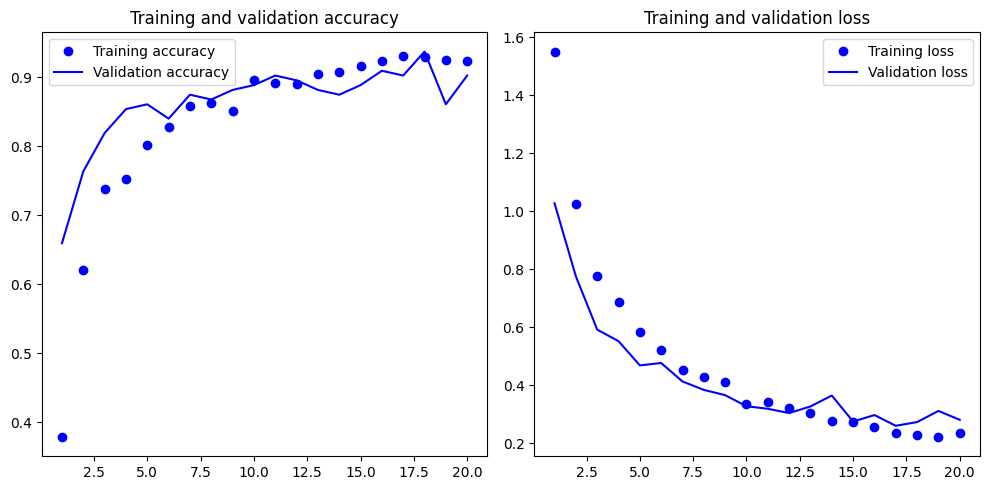

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary containing training information

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Create epochs list

plt.figure(figsize=(10, 5))  # Create a figure with specified size

# Plot accuracy
plt.subplot(121)  # Create a subplot in a 1x2 grid (first position)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.subplot(122)  # Create a subplot in a 1x2 grid (second position)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()


5/5 [==============================] - 17s 3s/step
Confusion Matrix:
 [[32  1  0  0  0]
 [ 1 44  0  0  1]
 [ 0  0 26  1  1]
 [ 0  0  1 23  1]
 [ 2  4  1  0 21]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       0.91      0.97      0.94        33
       clubbing       0.90      0.96      0.93        46
muehrckes_lines       0.93      0.93      0.93        28
    onycholysis       0.96      0.92      0.94        25
     white_spot       0.88      0.75      0.81        28

       accuracy                           0.91       160
      macro avg       0.91      0.90      0.91       160
   weighted avg       0.91      0.91      0.91       160



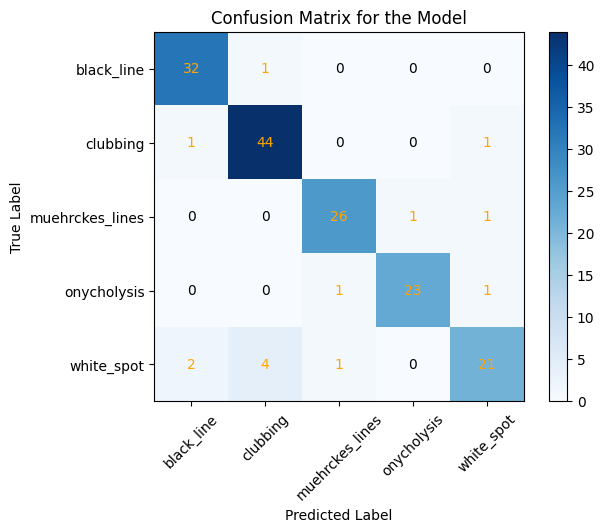

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ... (your code for model training and prediction)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix (now with the necessary import)
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix and classification report
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred_classes, target_names=class_names))

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
for i in range(len(cm)):
  for j in range(len(cm[i])):
    text = plt.text(j, i, cm[i, j], ha='center', va='center', color='orange' if cm[i, j] > 0 else 'black')

plt.title('Confusion Matrix for the Model')
plt.colorbar()
plt.show()


**HYBRID** **MODEL**

In [ ]:
import tensorflow as tf  # Import TensorFlow at the beginning
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Lambda, Add
from tensorflow.keras.layers import multiply  # Import Multiply layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split

# ... (rest of your code for data preparation remains the same)

# ... (other imports)

# Define dataset paths and class labels
# ... (data loading and preprocessing)

# Define dataset paths and class labels
data_dir = "/content/drive/MyDrive/nails disease"
class_names = ['black_line', 'clubbing', 'muehrckes_lines', 'onycholysis', 'white_spot']

# Load images and labels
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_path in os.listdir(class_dir):
        image = cv2.imread(os.path.join(class_dir, image_path), cv2.IMREAD_UNCHANGED)  # Read BMP images
        images.append(image)
        labels.append(class_names.index(class_name))

# Convert data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess images (adjust parameters as needed)
image_size = (144, 144)  # Adjust based on model requirements
images = np.array([cv2.resize(img, image_size) for img in images])
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Create data augmentation for training data (optional)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = datagen.flow(x_val, y_val, batch_size=32)

# Define image dimensions
img_height = 144
img_width = 144

# Load DenseNet121 with pre-trained ImageNet weights, freezing some layers
base_model = DenseNet121(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    weights='imagenet',
    pooling='avg'
)

# Fine-tune the top layers (experiment with the number of layers to unfreeze)
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

# Feature extraction from DenseNet121
encoded_features = base_model.output

# Soft attention layer (experiment with different attention functions if needed)
attention = Dense(1, activation='relu')(encoded_features)
attention = Flatten()(attention)
attention_weights = Lambda(lambda x: tf.keras.backend.softmax(x, axis=1))(attention)

# Weighted features based on attention scores
weighted_features = multiply([encoded_features, attention_weights])  # Use multiply function

# Concatenate original features and weighted features
concatenated_features = Add()([encoded_features, weighted_features])

# Classification head similar to the original model
x = Flatten()(concatenated_features)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model (adjust optimizer and learning rate as needed)
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model (replace with your data generators or datasets)
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Save the model (optional)
model.save('nail_disease_classification_attention.h5')



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 144, 144, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 150, 150, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 72, 72, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 72, 72, 64)           256       ['conv1/conv[0][0]']    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


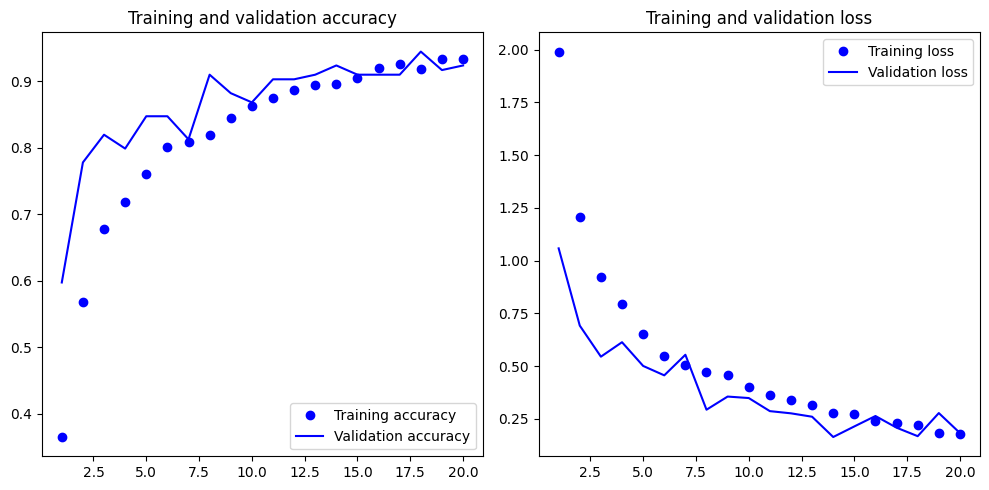

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary containing training information

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Create epochs list

plt.figure(figsize=(10, 5))  # Create a figure with specified size

# Plot accuracy
plt.subplot(121)  # Create a subplot in a 1x2 grid (first position)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.subplot(122)  # Create a subplot in a 1x2 grid (second position)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()


5/5 [==============================] - 24s 3s/step
Confusion Matrix:
 [[32  1  0  0  0]
 [ 0 44  1  1  0]
 [ 0  0 26  0  2]
 [ 0  0  0 25  0]
 [ 0  2  0  0 26]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       1.00      0.97      0.98        33
       clubbing       0.94      0.96      0.95        46
muehrckes_lines       0.96      0.93      0.95        28
    onycholysis       0.96      1.00      0.98        25
     white_spot       0.93      0.93      0.93        28

       accuracy                           0.96       160
      macro avg       0.96      0.96      0.96       160
   weighted avg       0.96      0.96      0.96       160



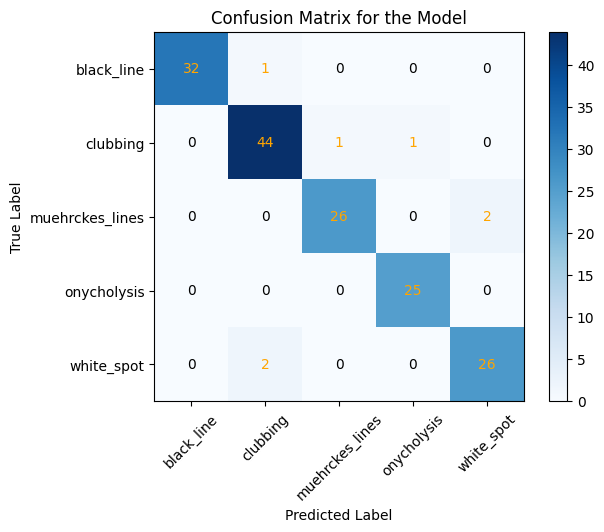

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ... (your code for model training and prediction)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix (now with the necessary import)
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix and classification report
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred_classes, target_names=class_names))

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
for i in range(len(cm)):
  for j in range(len(cm[i])):
    text = plt.text(j, i, cm[i, j], ha='center', va='center', color='orange' if cm[i, j] > 0 else 'black')

plt.title('Confusion Matrix for the Model')
plt.colorbar()
plt.show()


 **VGG19**


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define dataset paths and class labels
data_dir = "/content/drive/MyDrive/nails disease"
class_names = [ 'black_line', 'clubbing', 'muehrckes_lines', 'onycholysis', 'white_spot']

# Load images and labels
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_path in os.listdir(class_dir):
        image = cv2.imread(os.path.join(class_dir, image_path), cv2.IMREAD_UNCHANGED)  # Read BMP images
        images.append(image)
        labels.append(class_names.index(class_name))

# Convert data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess images (adjust parameters as needed)
image_size = (144, 144)  # Adjusted for VGG19
images = np.array([cv2.resize(img, image_size) for img in images])
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Create data augmentation for training data (optional)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = datagen.flow(x_val, y_val, batch_size=32)

# Load pre-trained VGG19 model and freeze weights for feature extraction
base_model = VGG19(weights='imagenet', include_top=False, input_shape=image_size + (3,))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create new model with fine-tuned layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



Epoch 1/20
41/41 [==============================] - 406s 10s/step - loss: 2.4815 - accuracy: 0.3486 - val_loss: 1.1533 - val_accuracy: 0.5208
Epoch 2/20
41/41 [==============================] - 399s 10s/step - loss: 1.1500 - accuracy: 0.5445 - val_loss: 1.1152 - val_accuracy: 0.5417
Epoch 3/20
41/41 [==============================] - 400s 10s/step - loss: 1.0383 - accuracy: 0.6003 - val_loss: 0.8965 - val_accuracy: 0.6736
Epoch 4/20
41/41 [==============================] - 398s 10s/step - loss: 0.8965 - accuracy: 0.6654 - val_loss: 1.0343 - val_accuracy: 0.5972
Epoch 5/20
41/41 [==============================] - 398s 10s/step - loss: 0.9147 - accuracy: 0.6429 - val_loss: 0.7876 - val_accuracy: 0.7222
Epoch 6/20
41/41 [==============================] - 398s 10s/step - loss: 0.7991 - accuracy: 0.6940 - val_loss: 0.6803 - val_accuracy: 0.7778
Epoch 7/20
41/41 [==============================] - 400s 10s/step - loss: 0.8009 - accuracy: 0.7033 - val_loss: 0.7099 - val_accuracy: 0.7639
Epoch 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code remains the same)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Create classification report
cr = classification_report(y_test, y_pred_classes, target_names=class_names)
print('Classification Report:\n', cr)


5/5 [==============================] - 52s 9s/step
Confusion Matrix:
 [[30  1  1  0  1]
 [ 3 36  7  0  0]
 [ 4  0 22  0  2]
 [ 2  1  0 21  1]
 [ 4  2  1  1 20]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       0.70      0.91      0.79        33
       clubbing       0.90      0.78      0.84        46
muehrckes_lines       0.71      0.79      0.75        28
    onycholysis       0.95      0.84      0.89        25
     white_spot       0.83      0.71      0.77        28

       accuracy                           0.81       160
      macro avg       0.82      0.81      0.81       160
   weighted avg       0.82      0.81      0.81       160



5/5 [==============================] - 45s 8s/step
Confusion Matrix:
 [[30  1  1  0  1]
 [ 3 36  7  0  0]
 [ 4  0 22  0  2]
 [ 2  1  0 21  1]
 [ 4  2  1  1 20]]
Classification Report:
                  precision    recall  f1-score   support

     black_line       0.70      0.91      0.79        33
       clubbing       0.90      0.78      0.84        46
muehrckes_lines       0.71      0.79      0.75        28
    onycholysis       0.95      0.84      0.89        25
     white_spot       0.83      0.71      0.77        28

       accuracy                           0.81       160
      macro avg       0.82      0.81      0.81       160
   weighted avg       0.82      0.81      0.81       160



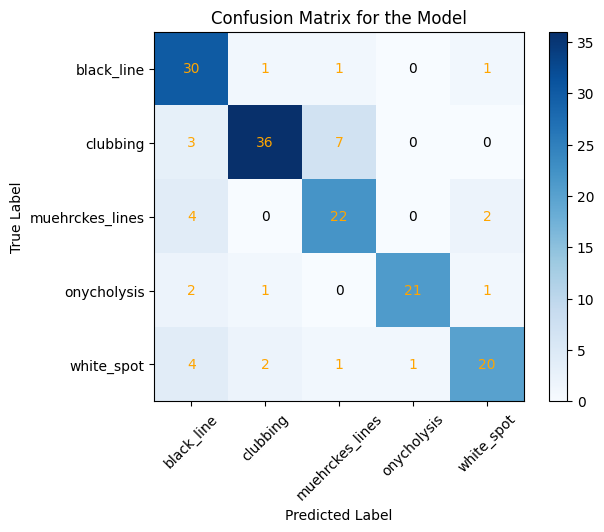

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ... (your code for model training and prediction)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix (now with the necessary import)
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix and classification report
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred_classes, target_names=class_names))

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
for i in range(len(cm)):
  for j in range(len(cm[i])):
    text = plt.text(j, i, cm[i, j], ha='center', va='center', color='orange' if cm[i, j] > 0 else 'black')

plt.title('Confusion Matrix for the Model')
plt.colorbar()
plt.show()


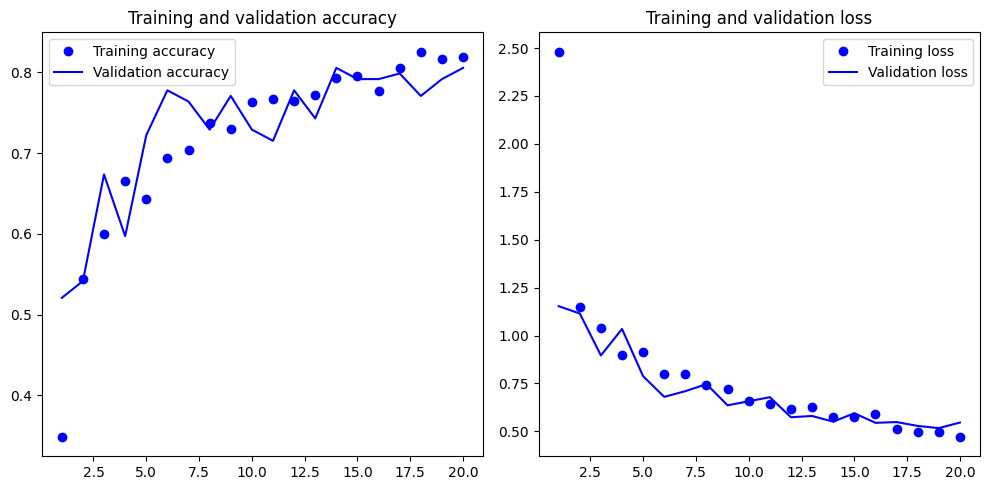

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary containing training information

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Create epochs list

plt.figure(figsize=(10, 5))  # Create a figure with specified size

# Plot accuracy
plt.subplot(121)  # Create a subplot in a 1x2 grid (first position)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.subplot(122)  # Create a subplot in a 1x2 grid (second position)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()


In [ ]:
import tensorflow as tf  # Import TensorFlow at the beginning
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Lambda, Add
from tensorflow.keras.layers import multiply  # Import Multiply layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split

# ... (rest of your code for data preparation remains the same)

# ... (other imports)

# Define dataset paths and class labels
# ... (data loading and preprocessing)

# Define dataset paths and class labels
data_dir = "/content/drive/MyDrive/nails disease"
class_names = ['black_line', 'clubbing', 'muehrckes_lines', 'onycholysis', 'white_spot']

# Load images and labels
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_path in os.listdir(class_dir):
        image = cv2.imread(os.path.join(class_dir, image_path), cv2.IMREAD_UNCHANGED)  # Read BMP images
        images.append(image)
        labels.append(class_names.index(class_name))

# Convert data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Preprocess images (adjust parameters as needed)
image_size = (224, 224)  # Adjust based on DenseNet201 input size
images = np.array([cv2.resize(img, image_size) for img in images])
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Create data augmentation for training data (optional)
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = datagen.flow(x_val, y_val, batch_size=32)

# Define image dimensions
img_height = 224
img_width = 224

# Load DenseNet201 with pre-trained ImageNet weights, freezing some layers
base_model = DenseNet201(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    weights='imagenet',
    pooling='avg'
)

# Fine-tune the top layers (experiment with the number of layers to unfreeze)
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

# Feature extraction from DenseNet201
encoded_features = base_model.output

# Soft attention layer (experiment with different attention functions if needed)
attention = Dense(1, activation='relu')(encoded_features)
attention = Flatten()(attention)
attention_weights = Lambda(lambda x: tf.keras.backend.softmax(x, axis=1))(attention)

# Weighted features based on attention scores
weighted_features = multiply([encoded_features, attention_weights])  # Use multiply function

# Concatenate original features and weighted features
concatenated_features = Add()([encoded_features, weighted_features])

# Classification head similar to the original model
x = Flatten()(concatenated_features)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model (adjust optimizer and learning rate as needed)
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model (replace with your data generators or datasets)
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Save the model (optional)
model.save('nail_disease_classification_attention.h5')




74836368/74836368 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

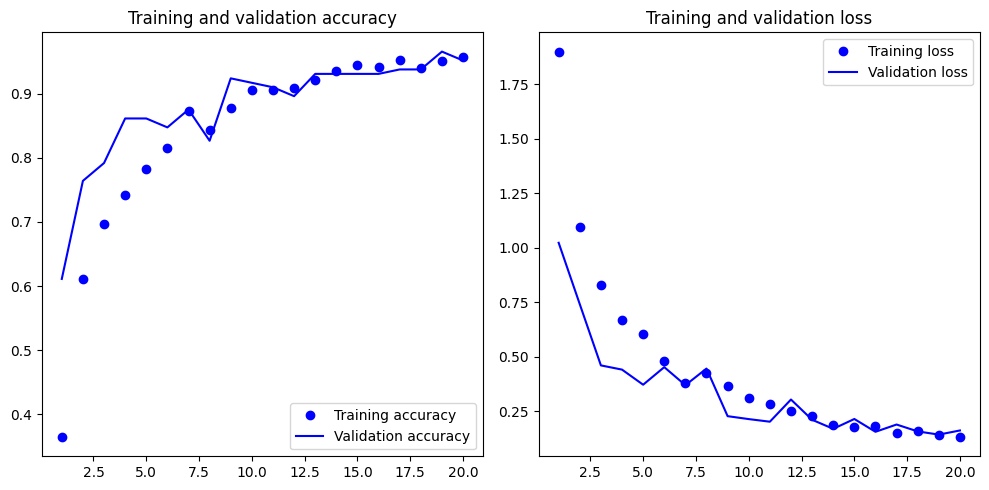

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary containing training information

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Create epochs list

plt.figure(figsize=(10, 5))  # Create a figure with specified size

# Plot accuracy
plt.subplot(121)  # Create a subplot in a 1x2 grid (first position)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.subplot(122)  # Create a subplot in a 1x2 grid (second position)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ... (your code for model training and prediction)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices for prediction labels

# Create confusion matrix (now with the necessary import)
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix and classification report
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred_classes, target_names=class_names))

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell
for i in range(len(cm)):
  for j in range(len(cm[i])):
    text = plt.text(j, i, cm[i, j], ha='center', va='center', color='orange' if cm[i, j] > 0 else 'black')

plt.title('Confusion Matrix for the Model')
plt.colorbar()
plt.show()


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 144, 144, 3), found shape=(32, 114, 114, 3)


**CUSTOM** **CNN**

In [ ]:
import os
import cv2
import numpy as np
from keras.models import Model
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Activation

In [ ]:
image_size = 128
num_classes=7
num_channels=3

In [ ]:
#create labels
classes=[]
filename="/content/drive/MyDrive"
for sub_folder in os.listdir(os.path.join(filename,'New')):
  classes.append(sub_folder)
print(classes)

['black_line', 'clubbing', 'onycholysis', 'white_spot', 'terrys_nail', 'muehrckes_lines', 'beaus_line']


In [ ]:
X_train = []
y_train = []
for i in classes:
    path_train = os.path.join(filename,'New',i)
    for j in tqdm(os.listdir(path_train)):
        img = cv2.imread(os.path.join(path_train,j))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_normalized = cv2.resize(img,(image_size, image_size))
        X_train.append(img_normalized)
        y_train.append(i)

X = np.array(X_train)
y = np.array(y_train)

lb = LabelEncoder()
labels_train=lb.fit(y)
y=lb.transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

image_height=image_size
image_width=image_size

input_shape = (image_height, image_width, num_channels)
#model = Sequential()
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(input_shape)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
     Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

100%|██████████| 1219/1219 [00:52<00:00, 23.01it/s] 


Epoch 1/20
212/212 [==============================] - 98s 453ms/step - loss: 2.1796 - accuracy: 0.1514
Epoch 2/20
212/212 [==============================] - 92s 435ms/step - loss: 1.9362 - accuracy: 0.1768
Epoch 3/20
212/212 [==============================] - 93s 440ms/step - loss: 1.8772 - accuracy: 0.2259
Epoch 4/20
212/212 [==============================] - 92s 433ms/step - loss: 1.7662 - accuracy: 0.2839
Epoch 5/20
212/212 [==============================] - 93s 441ms/step - loss: 1.6501 - accuracy: 0.3482
Epoch 6/20
212/212 [==============================] - 93s 439ms/step - loss: 1.5078 - accuracy: 0.4152
Epoch 7/20
212/212 [==============================] - 94s 443ms/step - loss: 1.3645 - accuracy: 0.4859
Epoch 8/20
212/212 [==============================] - 93s 440ms/step - loss: 1.2903 - accuracy: 0.5189
Epoch 9/20
212/212 [==============================] - 93s 438ms/step - loss: 1.2185 - accuracy: 0.5555
Epoch 10/20
212/212 [==============================] - 93s 440ms/step - l

53/53 [==============================] - 12s 211ms/step - loss: 0.7001 - accuracy: 0.7629
Test accuracy: 0.7628622055053711


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

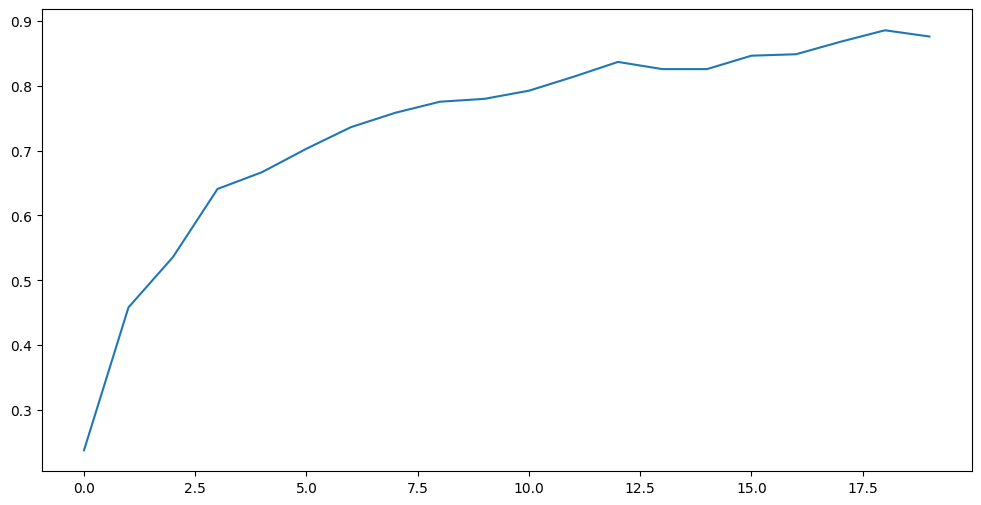

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class indices

# Print the predicted class labels (optional)
# for i, pred in enumerate(y_pred_classes):
#     predicted_label = lb.inverse_transform(np.array([pred]))[0]
#     print("Predicted Label for Image", i, ":", predicted_label)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Create classification report


53/53 [==============================] - 10s 174ms/step
Confusion Matrix:
[[163  15   9  12  19   0  27]
 [  9 195   4  16  15  10  11]
 [ 17   3 205  10   1   1   9]
 [  5   5  10 158  10  17  19]
 [  5   6   8  14 195  15   6]
 [  2   5   3  18   2 192   1]
 [ 15   4   4  20  11   8 182]]


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred_classes, target_names=lb.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

     beaus_line       0.75      0.67      0.71       245
     black_line       0.84      0.75      0.79       260
       clubbing       0.84      0.83      0.84       246
muehrckes_lines       0.64      0.71      0.67       224
    onycholysis       0.77      0.78      0.78       249
    terrys_nail       0.79      0.86      0.82       223
     white_spot       0.71      0.75      0.73       244

       accuracy                           0.76      1691
      macro avg       0.76      0.76      0.76      1691
   weighted avg       0.77      0.76      0.76      1691



**VGG19**